In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/CVT

/content/drive/My Drive/CVT


In [ ]:
%ls

 comparison.ipynb
 CVT_COVID-CT-CNN/
 data/
 DenseNet121_Training_and_Evaluation.ipynb
 final-figs/
 HO-data/
 InceptionResNetV2_Training_and_Evaluation.ipynb
 InceptionV3_Training_and_Evaluation.ipynb
 NASNetMobile_Training_and_Evaluation.ipynb
 __pycache__/
 saved_models/
 training_and_evaluation_utils_.py
'Vishakh directory'/
 XCeption_Training_and_Evaluation.ipynb


In [ ]:
from training_and_evaluation_utils_ import *

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
import pandas as pd

In [ ]:
dependencies = {
    'balanced_acc': balanced_acc,
    'f1' : f1,
    'f2' : f2,
    'specificity' : specificity,
    'sensitivity' : sensitivity
}
# dependencies2 = {
#     'balanced_acc': balanced_acc,
#     'get_f1' : get_f1,
#     'specificity' : specificity,
#     'sensitivity' : sensitivity
# }
model_dn121 = load_model("saved_models/dn121", custom_objects=dependencies)
model_inceptionres = load_model("saved_models/inceptionresnetv2", custom_objects=dependencies)
model_nnmobile = load_model("saved_models/nnmobile", custom_objects=dependencies)
model_xception = load_model("saved_models/xception", custom_objects=dependencies)
model_inceptionv3 = load_model("saved_models/inceptionv3", custom_objects= dependencies)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=IMAGE_SIZE,
        shuffle=False,
        class_mode='binary'
    )

test_generator2 = test_datagen.flow_from_directory(
        TEST2_DIR,
        target_size=IMAGE_SIZE,
        shuffle=False,
        class_mode='binary'
    )

y_true = 1 - test_generator.classes 

Found 690 images belonging to 2 classes.
Found 361 images belonging to 2 classes.


In [ ]:
dictionary_of_models = {"DenseNet121": model_dn121, "InceptionResNetV2": model_inceptionres, "Xception":model_xception, "NASNetMobile":model_nnmobile, 
                        "InceptionV3": model_inceptionv3}

In [ ]:
def get_metrics_dict(model):
  prediction = 1-model.predict(test_generator) #ho-dataset
  y_pred= [1 * (x[0]>=0.35) for x in prediction]
  return matrix_metrix(y_true, y_pred)

In [ ]:
def get_df(dict_models):
  metrics_dicts= [get_metrics_dict(model) for model in list(dict_models.values())]
  data = [list(dict.values()) for dict in metrics_dicts]
  index = list(dict_models.keys())
  columns = list(metrics_dicts[0].keys())
  return pd.DataFrame.from_records(data, index=index, columns=columns)

df_models = get_df(dictionary_of_models)

In [ ]:
df_models_simple = df_models[["Accuracy", "Recall", "TNR", "Precision", "F2", "F1", "FN", "FP", "TP","TN",]]
df_models_simple

,Accuracy,Recall,TNR,Precision,F2,F1,FN,FP,TP,TN
DenseNet121,0.893,0.978,0.797,0.844,0.9479,0.9061,8,66,357,259
InceptionResNetV2,0.894,0.962,0.818,0.856,0.9388,0.9059,14,59,351,266
Xception,0.900,0.907,0.892,0.904,0.9064,0.9055,34,35,331,290
NASNetMobile,0.896,0.934,0.852,0.877,0.9220,0.9046,24,48,341,277
InceptionV3,0.896,0.962,0.822,0.858,0.9392,0.9070,14,58,351,267


In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [ ]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

from IPython.display import display

display(df_models_simple.style.apply(highlight_max))

,Accuracy,Recall,TNR,Precision,F2,F1,FN,FP,TP,TN
DenseNet121,0.893000,0.978000,0.797000,0.844000,0.947900,0.906100,8,66,357,259
InceptionResNetV2,0.894000,0.962000,0.818000,0.856000,0.938800,0.905900,14,59,351,266
Xception,0.900000,0.907000,0.892000,0.904000,0.906400,0.905500,34,35,331,290
NASNetMobile,0.896000,0.934000,0.852000,0.877000,0.922000,0.904600,24,48,341,277
InceptionV3,0.896000,0.962000,0.822000,0.858000,0.939200,0.907000,14,58,351,267


In [ ]:
df_models_simple.style

,Accuracy,Recall,TNR,Precision,F2,F1,FN,FP,TP,TN
DenseNet121,0.893000,0.978000,0.797000,0.844000,0.947900,0.906100,8,66,357,259
InceptionResNetV2,0.894000,0.962000,0.818000,0.856000,0.938800,0.905900,14,59,351,266
Xception,0.900000,0.907000,0.892000,0.904000,0.906400,0.905500,34,35,331,290
NASNetMobile,0.896000,0.934000,0.852000,0.877000,0.922000,0.904600,24,48,341,277
InceptionV3,0.896000,0.962000,0.822000,0.858000,0.939200,0.907000,14,58,351,267


In [ ]:
import matplotlib.pyplot as plt

['DenseNet121', 'InceptionResNetV2', 'Xception', 'NASNetMobile', 'InceptionV3']


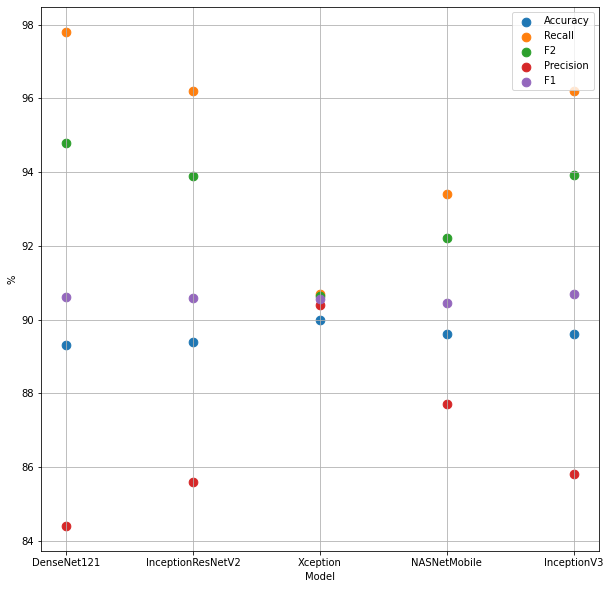

In [ ]:
def get_scatter_plot(df):
  plt.figure(figsize=(10,10))
  x = list(df.index.values.tolist())
  print(x)
  metrics_to_plot = ["Accuracy", "Recall", "F2", "Precision", "F1"]
  for i in range(len(metrics_to_plot)):
    plt.scatter(x, df[metrics_to_plot[i]]*100, 75, label=
              metrics_to_plot[i])
  plt.xlabel("Model")
  plt.ylabel("%")
  plt.grid()
  plt.legend()


get_scatter_plot(df_models)

[0 1 2 3 4]


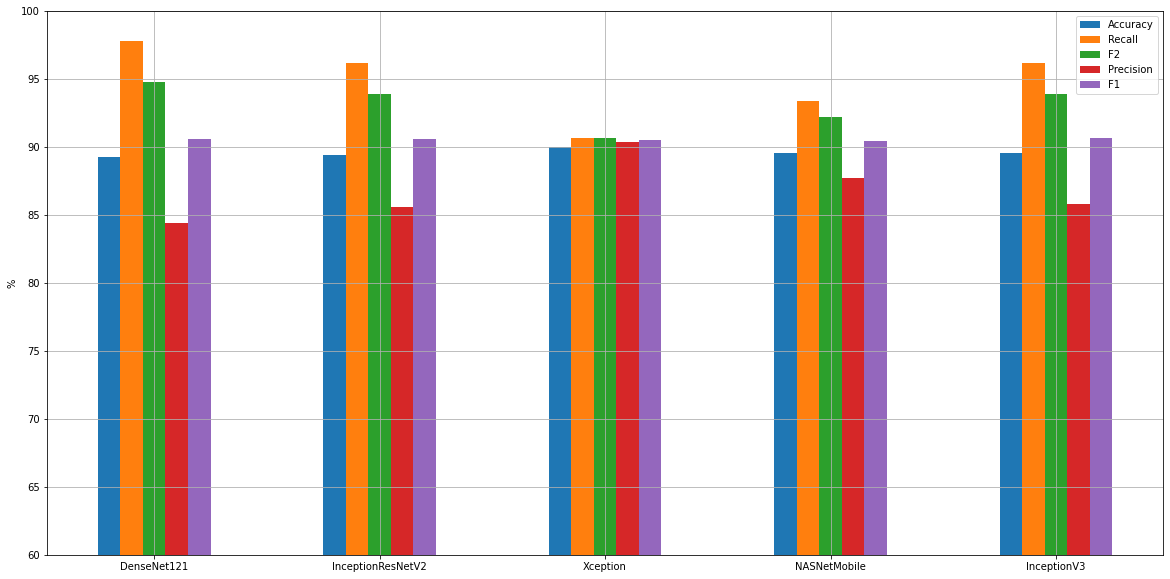

In [ ]:
def get_bar_plot(df):
  metrics_to_plot = ["Accuracy", "Recall", "F2", "Precision", "F1"]
  num_metrics = len(metrics_to_plot)
  labels = list(df.index.values.tolist())
  fig, ax = plt.subplots(figsize=(20,10))
  width = .1
  x = np.arange(len(labels))
  print(x)
  for k in range(num_metrics):
    median = num_metrics // 2
    diff_median = abs(median - k)
    if k < median:
      ax.bar(x - diff_median*width, df[metrics_to_plot[k]]*100, width, label = metrics_to_plot[k])
    else:
      ax.bar(x + diff_median*width, df[metrics_to_plot[k]]*100, width, label = metrics_to_plot[k])
  ax.set_ylabel('%')
  ax.set_ylim([60, 100])
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  ax.grid()
  plt.show()

get_bar_plot(df_models)

In [ ]:
# returns dictionary w/ model keys and prediction values
def get_preds(dict_models, test_generator):
  list_preds = [1-model.predict(test_generator) for model in dict_models.values()] #creates list of preds
  dict_preds = {}
  i = 0
  for key in dict_models:
    pred = list_preds[i]
    dict_preds[key] = pred
    i += 1
  return dict_preds

get_preds(dictionary_of_models, test_generator)

{'DenseNet121': array([[9.98892188e-01],
        [9.99636710e-01],
        [9.99980092e-01],
        [9.99994159e-01],
        [9.99997675e-01],
        [9.89799142e-01],
        [9.04323161e-01],
        [9.99913037e-01],
        [9.55788970e-01],
        [9.92603064e-01],
        [9.87481356e-01],
        [9.98453021e-01],
        [9.96245921e-01],
        [9.99088407e-01],
        [9.99838829e-01],
        [9.98296142e-01],
        [9.98949766e-01],
        [9.90082860e-01],
        [9.99997199e-01],
        [9.80607688e-01],
        [9.99949038e-01],
        [9.87524867e-01],
        [8.07079017e-01],
        [9.78040159e-01],
        [7.55739272e-01],
        [9.96700525e-01],
        [4.45067883e-04],
        [6.80616498e-02],
        [9.99963701e-01],
        [9.99337077e-01],
        [9.86042917e-01],
        [1.68085098e-05],
        [9.99371588e-01],
        [9.99999523e-01],
        [8.79551709e-01],
        [9.99849379e-01],
        [9.99864757e-01],
        [9.26058292e-01

NonCOVID/Non-Covid (516).png
{'DenseNet121': array([1.9192696e-05], dtype=float32), 'InceptionResNetV2': array([0.], dtype=float32), 'Xception': array([1.66893e-06], dtype=float32), 'NASNetMobile': array([9.191036e-05], dtype=float32), 'InceptionV3': array([1.0371208e-05], dtype=float32)}


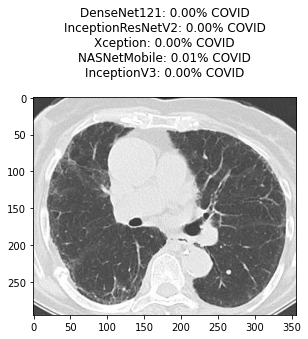

NonCOVID/Non-Covid (323).png
{'DenseNet121': array([0.00105673], dtype=float32), 'InceptionResNetV2': array([9.179115e-06], dtype=float32), 'Xception': array([2.3841858e-06], dtype=float32), 'NASNetMobile': array([0.0001632], dtype=float32), 'InceptionV3': array([0.00778902], dtype=float32)}


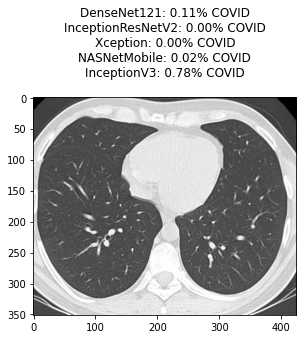

COVID/2020.03.13.20035212-p23-152.png
{'DenseNet121': array([0.9993371], dtype=float32), 'InceptionResNetV2': array([0.9842449], dtype=float32), 'Xception': array([0.9999996], dtype=float32), 'NASNetMobile': array([0.4519713], dtype=float32), 'InceptionV3': array([0.9997417], dtype=float32)}


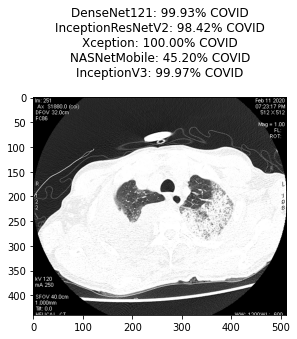

NonCOVID/Non-Covid (842).png
{'DenseNet121': array([0.000301], dtype=float32), 'InceptionResNetV2': array([0.], dtype=float32), 'Xception': array([3.5762787e-07], dtype=float32), 'NASNetMobile': array([8.583069e-06], dtype=float32), 'InceptionV3': array([0.], dtype=float32)}


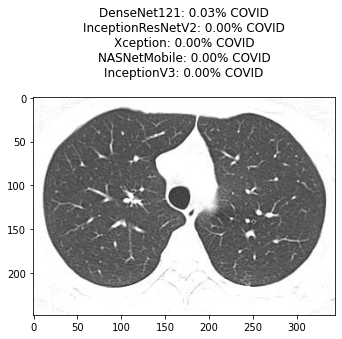

NonCOVID/Non-Covid (885).png
{'DenseNet121': array([2.4795532e-05], dtype=float32), 'InceptionResNetV2': array([9.179115e-06], dtype=float32), 'Xception': array([0.00513905], dtype=float32), 'NASNetMobile': array([0.35660166], dtype=float32), 'InceptionV3': array([2.3841858e-07], dtype=float32)}


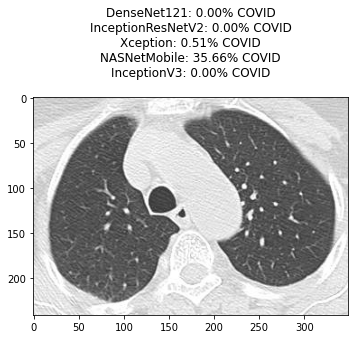

COVID/img642.jpg
{'DenseNet121': array([0.84887284], dtype=float32), 'InceptionResNetV2': array([0.64632004], dtype=float32), 'Xception': array([0.46224183], dtype=float32), 'NASNetMobile': array([0.83727705], dtype=float32), 'InceptionV3': array([0.6043399], dtype=float32)}


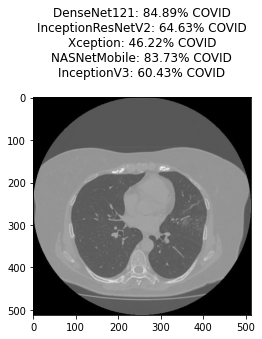

NonCOVID/Non-Covid (569).png
{'DenseNet121': array([8.08239e-05], dtype=float32), 'InceptionResNetV2': array([0.], dtype=float32), 'Xception': array([3.5762787e-06], dtype=float32), 'NASNetMobile': array([5.364418e-06], dtype=float32), 'InceptionV3': array([0.03895909], dtype=float32)}


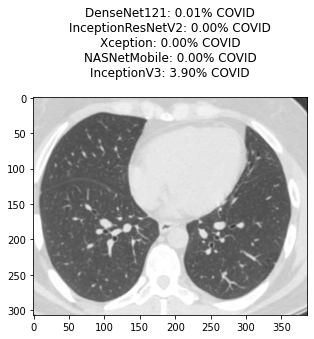

COVID/Covid (457).png
{'DenseNet121': array([0.9999146], dtype=float32), 'InceptionResNetV2': array([0.9999806], dtype=float32), 'Xception': array([1.], dtype=float32), 'NASNetMobile': array([0.99999154], dtype=float32), 'InceptionV3': array([0.99999905], dtype=float32)}


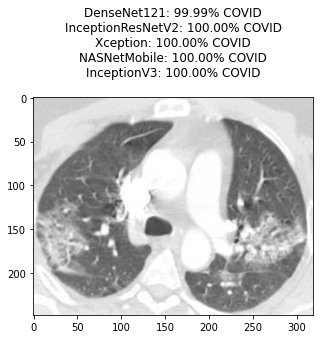

COVID/mosmed_img1.jpg
{'DenseNet121': array([1.], dtype=float32), 'InceptionResNetV2': array([0.99998266], dtype=float32), 'Xception': array([0.9999998], dtype=float32), 'NASNetMobile': array([1.], dtype=float32), 'InceptionV3': array([1.], dtype=float32)}


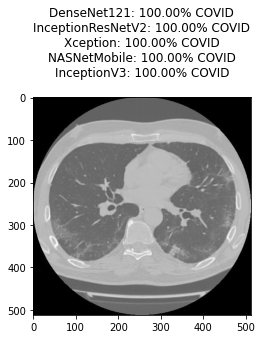

COVID/2020.03.12.20027185-p8-221.png
{'DenseNet121': array([0.9999637], dtype=float32), 'InceptionResNetV2': array([0.9999945], dtype=float32), 'Xception': array([1.], dtype=float32), 'NASNetMobile': array([0.99999964], dtype=float32), 'InceptionV3': array([0.9999933], dtype=float32)}


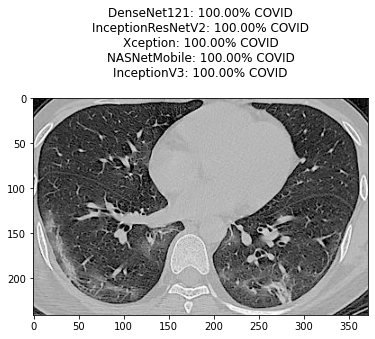

In [ ]:
def visualize_predictions_multiple(dict_models, test_generator):
  dict_preds = get_preds(dict_models, test_generator) # dict containing models w predictions
  list_preds = list(dict_preds.values())
  rand_samp = random.sample(range(len(list_preds[0])), 10)
  for index in range(10):
    print(test_generator.filenames[rand_samp[index]])
    image_path =  TEST_DIR + "/" +test_generator.filenames[rand_samp[index]]
    image = mpimg.imread(image_path, 0)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = np.array(image)
    plt.imshow(pixels)
    display = {}
    for model in dict_preds:
      display[model]= dict_preds[model][rand_samp[index]]
    print(display)
    title = ''
    for model, pred in display.items():
      title= title + model + ': ' + '%.2f' % ((pred)*100) + '% COVID\n'
    plt.title(title)
    plt.show()

visualize_predictions_multiple(dictionary_of_models, test_generator)

In [ ]:
def visualize_predictions_all(dict_models, test_generator):
  dict_preds = get_preds(dict_models, test_generator) # dict containing models w predictions
  list_preds = list(dict_preds.values())
  for i in range(len(test_generator.filenames)):
    print(test_generator.filenames[i])
    image_path =  TEST_DIR + "/" +test_generator.filenames[i]
    image = mpimg.imread(image_path, 0)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = np.array(image)
    plt.imshow(pixels)
    display = {}
    for model in dict_preds:
      display[model]= dict_preds[model][i]
    print(display)
    title = ''
    for model, pred in display.items():
      title= title + model + ': ' + '%.2f' % ((pred)*100) + '% COVID\n'
    i += 1
    plt.title(title)
    plt.show()

visualize_predictions_all(dictionary_of_models, test_generator)

In [ ]:
  # y_true = 1 - test_generator.classes 
  # prediction = 1-model_dn121.predict(test_generator)
  # y_pred = [1 * (x[0]>=0.7) for x in prediction]

  # false_pos = []
  # false_neg = []
  # true_pos = []
  # true_neg = []

  # for i in range(len(y_true)):
  #   if(y_true[i] == 0 and y_pred[i] == 1):
  #     false_pos.append(i)
  #   if(y_true[i] == 1 and y_pred[i] == 1):
  #     true_pos.append(i)
  #   if(y_true[i] == 0 and y_pred[i] == 0):
  #     true_neg.append(i)
  #   if(y_true[i] == 1 and y_pred[i] == 0):
  #     false_neg.append(i)

  # print(len(false_pos))
  # for x in range(len(false_pos)):
  #   probability = prediction[false_pos[x]]
  #   image_path =  TEST_DIR + "/" +test_generator.filenames[false_pos[x]]
  #   image = mpimg.imread(image_path, 0)
    
  #   #BGR TO RGB conversion using CV2
  #   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #   pixels = np.array(image)
  #   plt.imshow(pixels)
  #   print("prob:{}".format(probability))
  #   print(test_generator.filenames[false_pos[x]])
  #   plt.title('%.2f' % ((probability)*100) + '% COVID')
  #   plt.show()



